# **t-SNE on MNIST data**

In [33]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

### Data 

In [34]:
data = datasets.fetch_openml('mnist_784', version = 1,
                             return_X_y = True)

pixel_values, targets = data
targets = targets.astype(int)

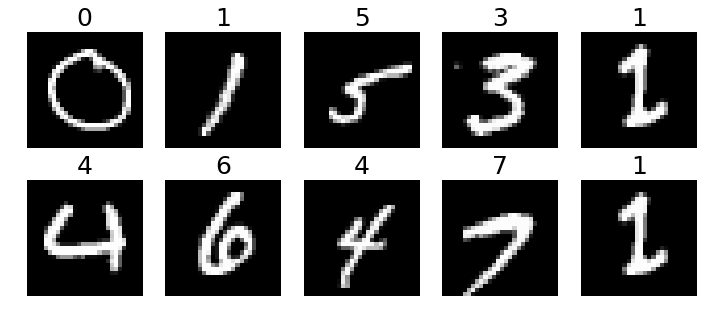

In [35]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()

idx = np.random.randint(0,100,size=10)
for i in range(10):
    axes[i].imshow(pixel_values[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(targets[idx[i]])), color= 'black', fontsize=25)
plt.show()

# TSNE
t-SNE is tool to visualize high dimensional data using similarities scores of the data points and t-distribution. 

In [36]:
tsne = manifold.TSNE(n_components =2, random_state = 42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [37]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                        columns=["x", "y", "targets"])

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

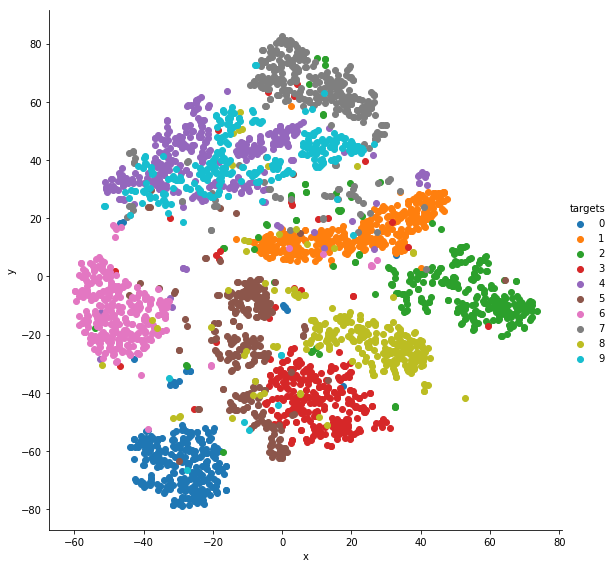

In [38]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()